<a href="https://colab.research.google.com/github/AgnesMachau/Vaccination-Rates-Analysis-for-Preventable-Childhood-Diseases-in-Nigeria/blob/main/Vaccination_Rates_Analysis_for_Preventable_Childhood_Diseases_in_Nigeria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import relevant libraries

In [ ]:
#import relevant libraries for the study
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

##Reading the Dataset

In [ ]:
#Reading the dataset
#Previewing the first 10 rows of the dataset
df = pd.read_csv('Vaccination Dataset States.csv', index_col=False)
df.head(10)

,_id,state,vaccine,total
0,1,Abia,Any,95.5
1,2,Abia,Measles,86.4
2,3,Abia,Penta 1,95.5
3,4,Abia,Penta 2,90.9
4,5,Abia,Penta 3,86.4
5,6,Adamawa,Any,83.5
6,7,Adamawa,Measles,68.4
7,8,Adamawa,Penta 1,69.9
8,9,Adamawa,Penta 2,63.2
9,10,Adamawa,Penta 3,51.9


In [ ]:
#Previewing the last 10 rows of the dataset
df.tail(10)

,_id,state,vaccine,total
175,181,Yobe,Any,72.4
176,182,Yobe,Measles,64.5
177,183,Yobe,Penta 1,67.8
178,184,Yobe,Penta 2,63.2
179,185,Yobe,Penta 3,51.3
180,186,Zamfara,Any,28.2
181,187,Zamfara,Measles,20.4
182,188,Zamfara,Penta 1,20.8
183,189,Zamfara,Penta 2,17.1
184,190,Zamfara,Penta 3,12.0


##Checking the dataset

In [ ]:
#Checking the number of rows and columns in the dataset
df.shape

(185, 4)

The dataset has 190 rows and 4 columns.

In [ ]:
#Checking the info on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   _id      185 non-null    int64  
 1   state    185 non-null    object 
 2   vaccine  185 non-null    object 
 3   total    185 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.9+ KB


The dataset has no null values in all the columns.

In [ ]:
#Checking the data types of the dataset's variables
df.dtypes

_id          int64
state       object
vaccine     object
total      float64
dtype: object

In [ ]:
#checking for the unique values in the dataset's columns
df.nunique()


_id        185
state       37
vaccine      5
total      152
dtype: int64

In [ ]:
#checking the dataset's columns
df.columns

Index(['_id', 'state', 'vaccine', 'total'], dtype='object')

##Data Pre-Processing

###Checking for Data Consistency

In [ ]:
#checking for any duplicates
#dropping duplicates
df.duplicated()
df_clean =df.drop_duplicates()
df_clean.shape

(185, 4)

###Checking for data completeness

In [ ]:
#Confirming there are no null values in each column
df_clean.isnull().sum()

_id        0
state      0
vaccine    0
total      0
dtype: int64

###Organising the dataset

In [ ]:
# Pivot the DataFrame to create columns for all types of vaccines
df_new = df.pivot(index='state', columns='vaccine', values='total').reset_index()

# Rename the columns
df_new.columns.name = None

# Print the resulting DataFrame
print(df_new)

          state   Any  Measles  Penta 1  Penta 2  Penta 3
0          Abia  95.5     86.4     95.5     90.9     86.4
1       Adamawa  83.5     68.4     69.9     63.2     51.9
2     Akwa Ibom  83.5     63.5     81.2     81.2     65.9
3       Anambra  96.2     77.2     91.1     86.1     81.0
4        Bauchi  65.9     54.5     52.8     48.3     41.5
5       Bayelsa  76.7     51.7     60.0     53.3     41.7
6         Benue  84.4     60.4     62.5     55.2     40.6
7         Borno  66.7     54.6     60.5     57.1     44.5
8   Cross River  89.4     75.3     89.4     87.1     81.2
9         Delta  93.8     79.7     84.4     79.7     73.4
10       Ebonyi  94.0     74.6     91.0     89.6     74.6
11          Edo  95.3     87.5     93.8     90.6     81.3
12        Ekiti  98.5     92.3     96.9     95.4     92.3
13        Enugu  94.9     79.7     88.1     86.4     83.1
14          FCT  89.0     85.4     87.8     85.4     80.5
15        Gombe  69.7     63.0     61.2     55.2     49.1
16          Im

In [ ]:
#Previewing the first 10 rows of the organized dataset
df_new.head(10)

,state,Any,Measles,Penta 1,Penta 2,Penta 3
0,Abia,95.5,86.4,95.5,90.9,86.4
1,Adamawa,83.5,68.4,69.9,63.2,51.9
2,Akwa Ibom,83.5,63.5,81.2,81.2,65.9
3,Anambra,96.2,77.2,91.1,86.1,81.0
4,Bauchi,65.9,54.5,52.8,48.3,41.5
5,Bayelsa,76.7,51.7,60.0,53.3,41.7
6,Benue,84.4,60.4,62.5,55.2,40.6
7,Borno,66.7,54.6,60.5,57.1,44.5
8,Cross River,89.4,75.3,89.4,87.1,81.2
9,Delta,93.8,79.7,84.4,79.7,73.4


In [ ]:
df_new.to_csv('Vaccination dataset1.csv')

In [ ]:
#Check the number of rows and columns of the organized dataset
df_new.shape

(37, 6)

In [ ]:
#Check the columns of the organized dataset
df_new.columns

Index(['state', 'Any', 'Measles', 'Penta 1', 'Penta 2', 'Penta 3'], dtype='object')

In [ ]:
##Checking the unique values of the columns to confirm all Nigerian states are represented in the dataset
df_new.nunique()

state      37
Any        35
Measles    36
Penta 1    37
Penta 2    35
Penta 3    36
dtype: int64

The dataset contains 36 states , the Federal Capital Territory and Nigeria as a whole

###Check for Data Validity

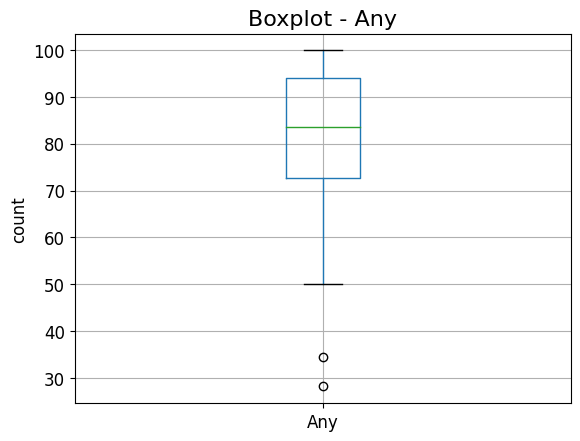

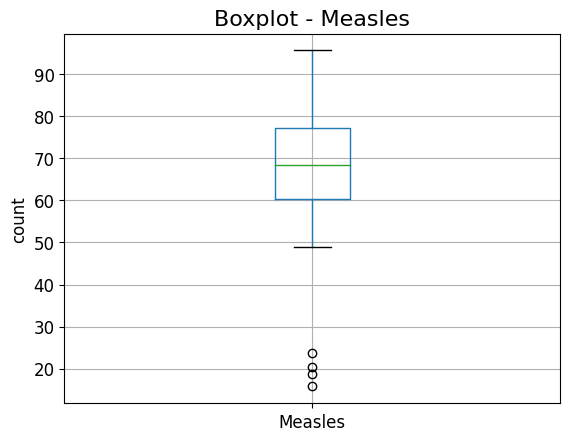

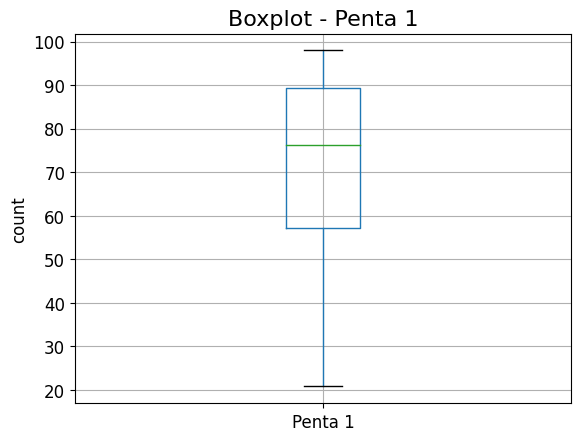

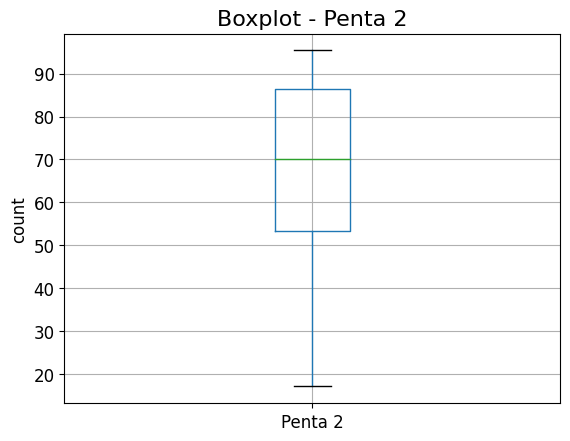

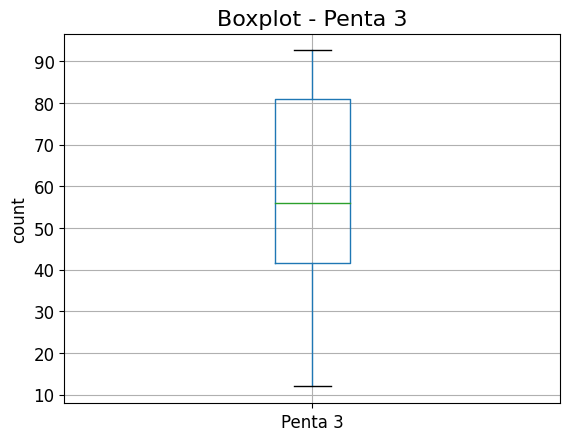

In [ ]:
#Checking for Outliers
cols = [ 'Any', 'Measles', 'Penta 1', 'Penta 2', 'Penta 3']

for column in cols:
    plt.figure()
    df_new.boxplot([column], fontsize= 12)
    plt.ylabel('count', fontsize = 12)
    plt.title('Boxplot - {}'.format(column), fontsize = 16)

##Exploratory Data Analysis

###Descriptive Statistics

In [ ]:
#Check the descriptive statistics of the dataset
df_new.describe()

,Any,Measles,Penta 1,Penta 2,Penta 3
count,37.000000,37.000000,37.000000,37.000000,37.000000
mean,80.481081,65.602703,71.335135,66.878378,58.143243
std,17.351638,19.693223,21.068001,22.331706,22.950581
min,28.200000,15.800000,20.800000,17.100000,12.000000
25%,72.700000,60.400000,57.100000,53.300000,41.700000
50%,83.600000,68.400000,76.300000,70.000000,56.000000
75%,94.000000,77.200000,89.400000,86.400000,81.000000
max,99.900000,95.600000,98.000000,95.400000,92.600000


In [ ]:
#Checking for skewness
df_new.skew(numeric_only=True)

Any       -1.415786
Measles   -1.160013
Penta 1   -0.693281
Penta 2   -0.661935
Penta 3   -0.287480
dtype: float64

In [ ]:
#Checking for kurtosis
df_new.kurtosis(numeric_only=True)

Any        1.927751
Measles    1.253133
Penta 1   -0.314150
Penta 2   -0.395672
Penta 3   -0.805501
dtype: float64

In [ ]:
#checking how variables are correlated
correlations = df_new.corr()
correlations

<ipython-input-21-8114f0d2a538>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df_new.corr()


,Any,Measles,Penta 1,Penta 2,Penta 3
Any,1.000000,0.932579,0.932611,0.922885,0.897460
Measles,0.932579,1.000000,0.899875,0.912242,0.898941
Penta 1,0.932611,0.899875,1.000000,0.994873,0.974126
Penta 2,0.922885,0.912242,0.994873,1.000000,0.980883
Penta 3,0.897460,0.898941,0.974126,0.980883,1.000000


<ipython-input-22-27eaa4bfd88b>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_new.corr()


<Axes: >

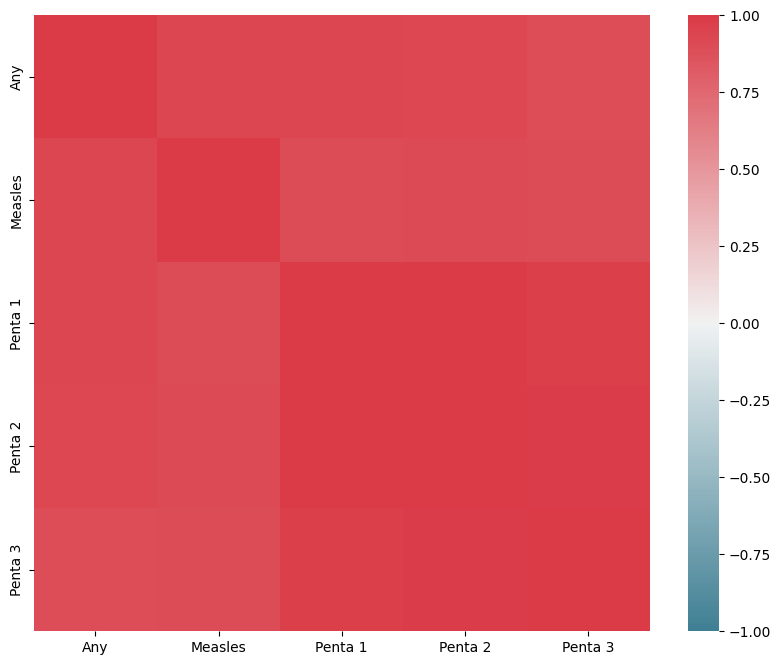

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
f, ax = plt.subplots(figsize=(10, 8))
corr = df_new.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

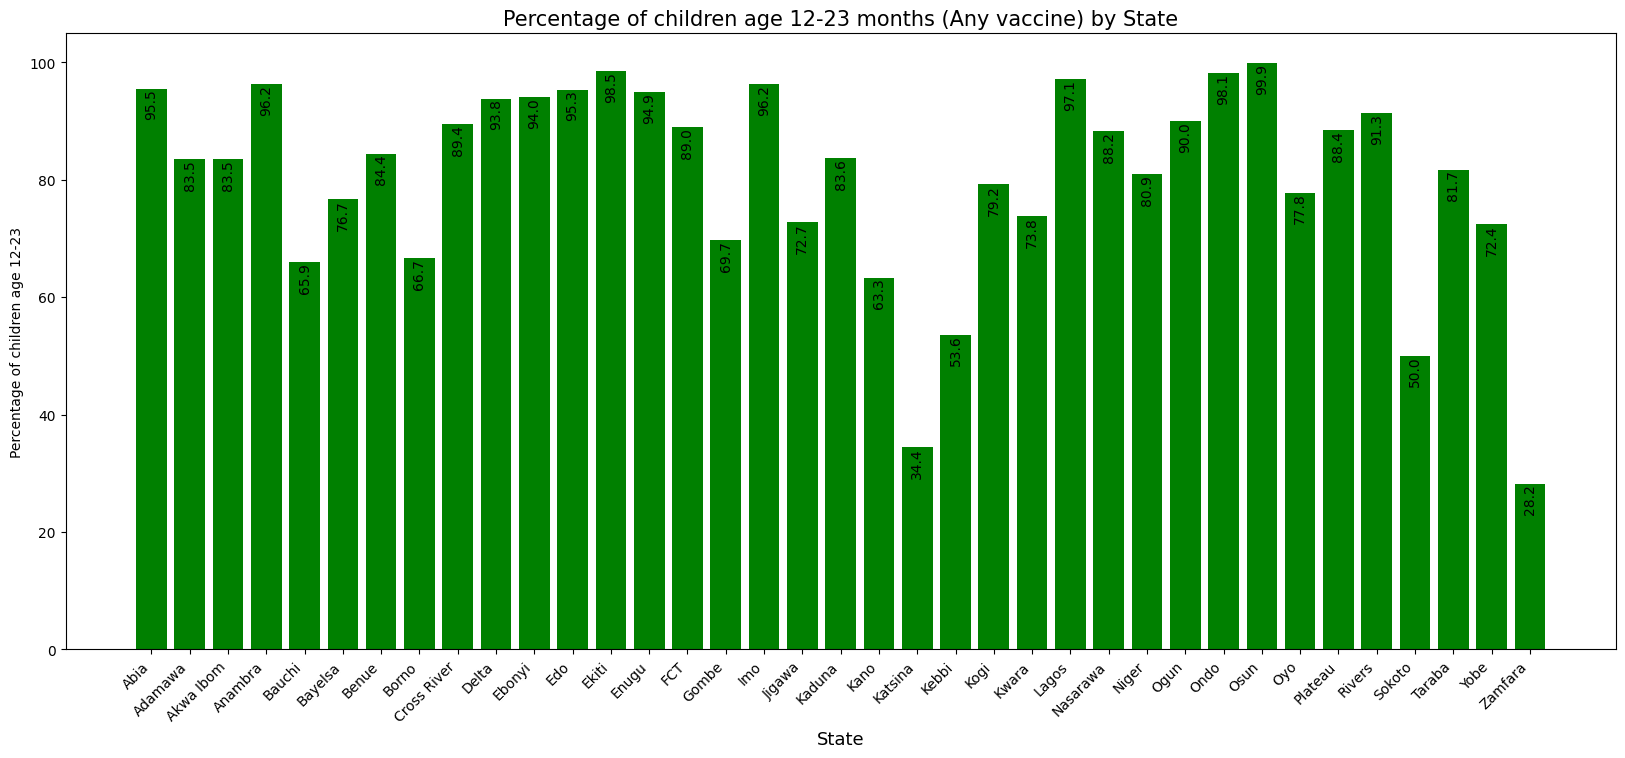

In [ ]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=45, ha='right')
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], rotation='vertical', ha='center', va='top')

if __name__ == '__main__':
    # creating data on which bar chart will be plot
    x = df_new['state']
    y = df_new['Any']

    # making the bar chart on the data
    plt.bar(x, y, color='green')

    # calling the function to add value labels
    addlabels(x, y)



    # giving title to the plot
    plt.title('Percentage of children age 12-23 months (Any vaccine) by State', fontsize=15)

    # giving X and Y labels
    plt.xlabel('State', fontsize=13)
    plt.ylabel("Percentage of children age 12-23")

    # visualizing the plot
    plt.show()


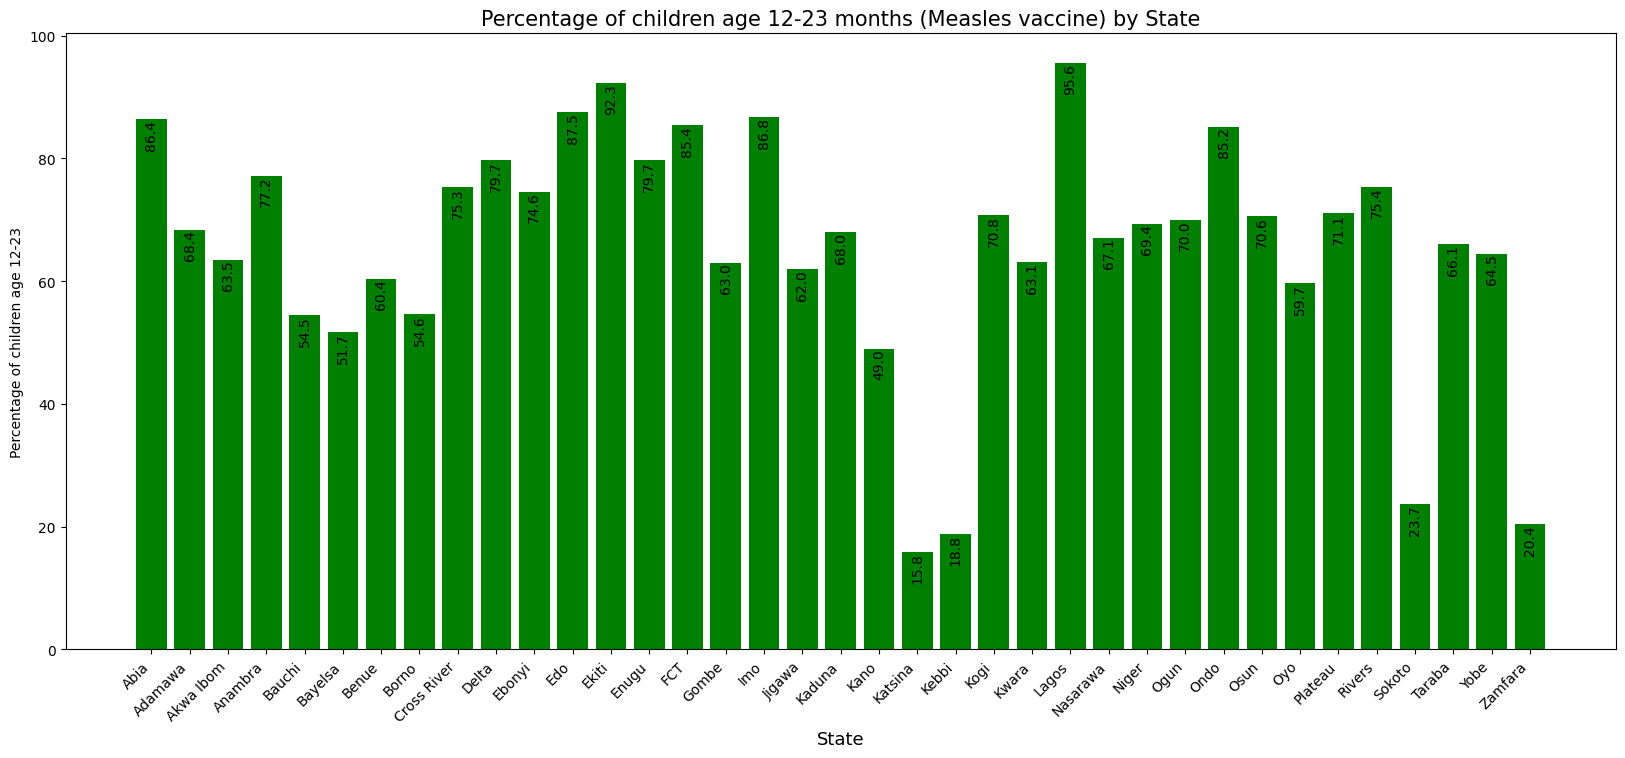

In [ ]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=45, ha='right')
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], rotation='vertical', ha='center', va='top')

if __name__ == '__main__':
    # creating data on which bar chart will be plot
    x = df_new['state']
    y = df_new['Measles']


    # making the bar chart on the data
    plt.bar(x, y, color='green')

    # calling the function to add value labels
    addlabels(x, y)



    # giving title to the plot
    plt.title('Percentage of children age 12-23 months (Measles vaccine) by State', fontsize=15)

    # giving X and Y labels
    plt.xlabel('State', fontsize=13)
    plt.ylabel("Percentage of children age 12-23")

    # visualizing the plot
    plt.show()


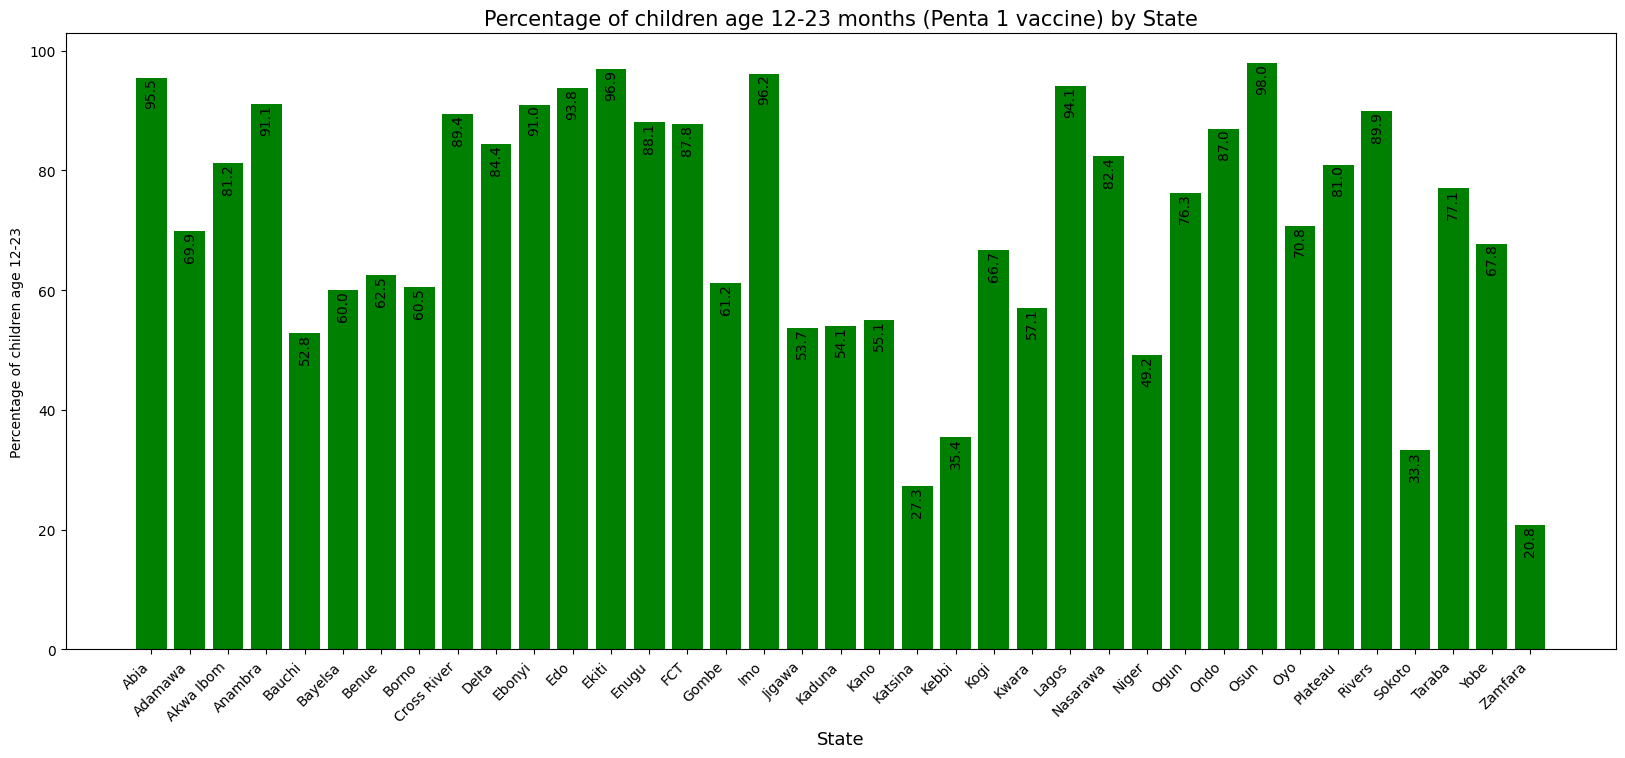

In [ ]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=45, ha='right')
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], rotation='vertical', ha='center', va='top')

if __name__ == '__main__':
    # creating data on which bar chart will be plot
    x = df_new['state']
    y = df_new['Penta 1']

    # making the bar chart on the data
    plt.bar(x, y, color='green')

    # calling the function to add value labels
    addlabels(x, y)



    # giving title to the plot
    plt.title('Percentage of children age 12-23 months (Penta 1 vaccine) by State', fontsize=15)

    # giving X and Y labels
    plt.xlabel('State', fontsize=13)
    plt.ylabel("Percentage of children age 12-23")

    # visualizing the plot
    plt.show()


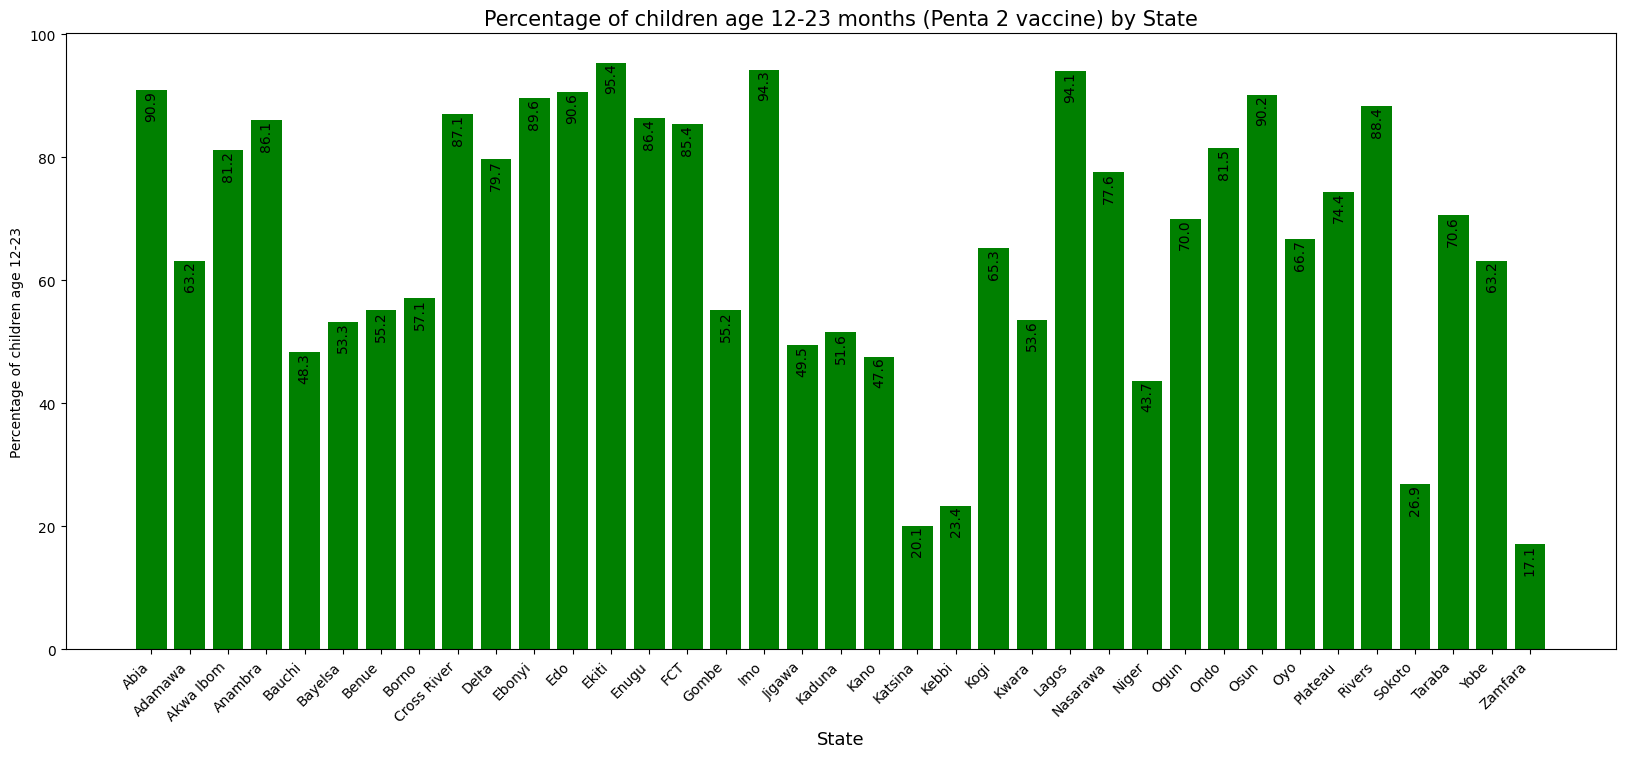

In [ ]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=45, ha='right')
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], rotation='vertical', ha='center', va='top')

if __name__ == '__main__':
    # creating data on which bar chart will be plot
    x = df_new['state']
    y = df_new['Penta 2']

    # making the bar chart on the data
    plt.bar(x, y, color='green')

    # calling the function to add value labels
    addlabels(x, y)



    # giving title to the plot
    plt.title('Percentage of children age 12-23 months (Penta 2 vaccine) by State', fontsize=15)

    # giving X and Y labels
    plt.xlabel('State', fontsize=13)
    plt.ylabel("Percentage of children age 12-23")

    # visualizing the plot
    plt.show()


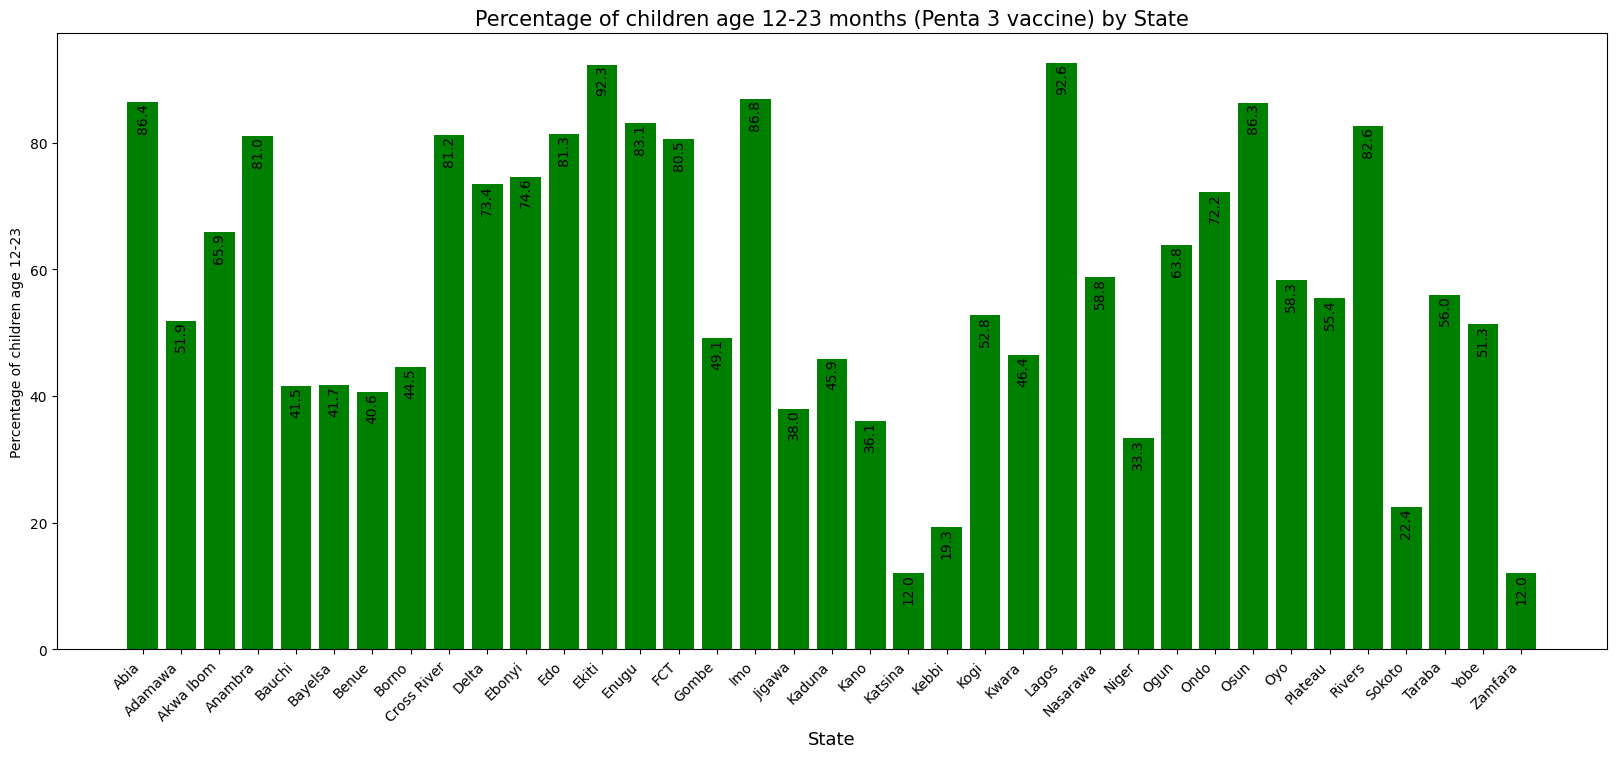

In [ ]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=45, ha='right')
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], rotation='vertical', ha='center', va='top')

if __name__ == '__main__':
    # creating data on which bar chart will be plot
    x = df_new['state']
    y = df_new['Penta 3']

    # making the bar chart on the data
    plt.bar(x, y, color='green')

    # calling the function to add value labels
    addlabels(x, y)



    # giving title to the plot
    plt.title('Percentage of children age 12-23 months (Penta 3 vaccine) by State', fontsize=15)

    # giving X and Y labels
    plt.xlabel('State', fontsize=13)
    plt.ylabel("Percentage of children age 12-23")

    # visualizing the plot
    plt.show()


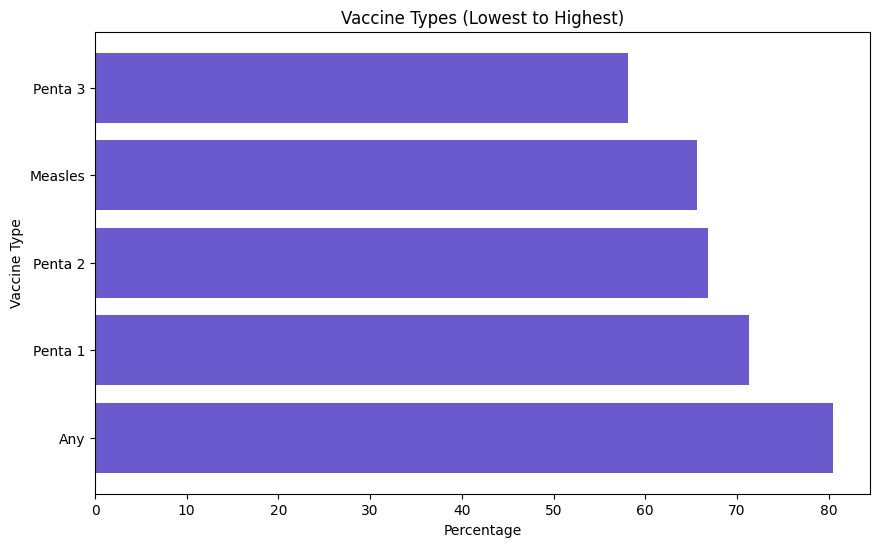

In [ ]:
# Sort the vaccine types by their values in descending order
sorted_vaccine_types = df_new[['Penta 1', 'Penta 2', 'Penta 3', 'Any', 'Measles']].mean().sort_values(ascending=False)

# Get the values for the sorted vaccine types
sorted_values = [df_new[vaccine_type].mean() for vaccine_type in sorted_vaccine_types.index]

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.barh(sorted_vaccine_types.index, sorted_values, color='slateblue')

# Add labels and title
plt.xlabel('Percentage')
plt.ylabel('Vaccine Type')
plt.title('Vaccine Types (Lowest to Highest)')

# Show the plot
plt.show()


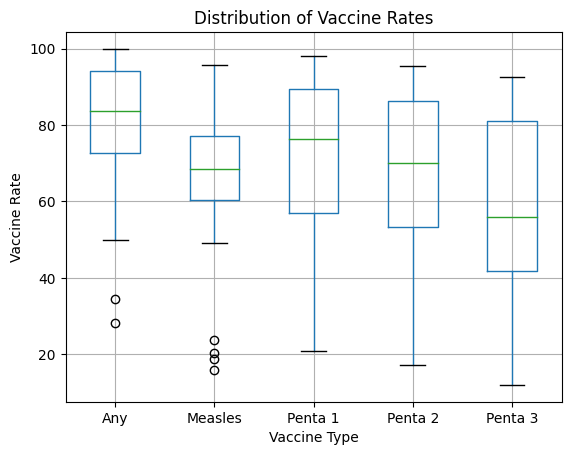

In [ ]:
df_new.boxplot(column=['Any', 'Measles', 'Penta 1', 'Penta 2', 'Penta 3'])
plt.xlabel('Vaccine Type')
plt.ylabel('Vaccine Rate')
plt.title('Distribution of Vaccine Rates')
plt.show()

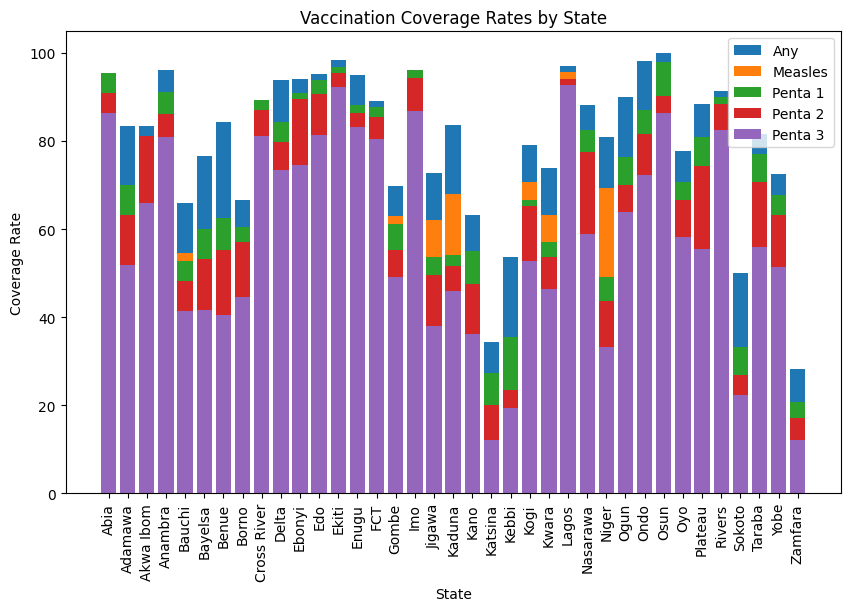

In [ ]:
# Extract the required data
states = df_new['state']
measles_coverage = df_new['Measles']
penta1_coverage = df_new['Penta 1']
penta2_coverage = df_new['Penta 2']
penta3_coverage = df_new['Penta 3']
any_coverage = df_new['Any']


# Plot the bar chart
plt.figure(figsize=(10, 6))

plt.bar(states, any_coverage, label='Any')
plt.bar(states, measles_coverage, label='Measles')
plt.bar(states, penta1_coverage, label='Penta 1')
plt.bar(states, penta2_coverage, label='Penta 2')
plt.bar(states, penta3_coverage, label='Penta 3')


plt.xlabel('State')
plt.ylabel('Coverage Rate')
plt.title('Vaccination Coverage Rates by State')
plt.legend()
plt.xticks(rotation=90)
plt.show()

##Reading the merged dataset

In [ ]:
merged_df = pd.read_csv('combined dataset.csv')
merged_df.head()

,state,Any,Measles,Penta 1,Penta 2,Penta 3,Estimated Population (2018)
0,Abia,95.5,86.4,95.5,90.9,86.4,3901620
1,Adamawa,83.5,68.4,69.9,63.2,51.9,4438628
2,Akwa Ibom,83.5,63.5,81.2,81.2,65.9,5737270
3,Anambra,96.2,77.2,91.1,86.1,81.0,5808135
4,Bauchi,65.9,54.5,52.8,48.3,41.5,6844061


In [ ]:
merged_df.shape

(37, 7)

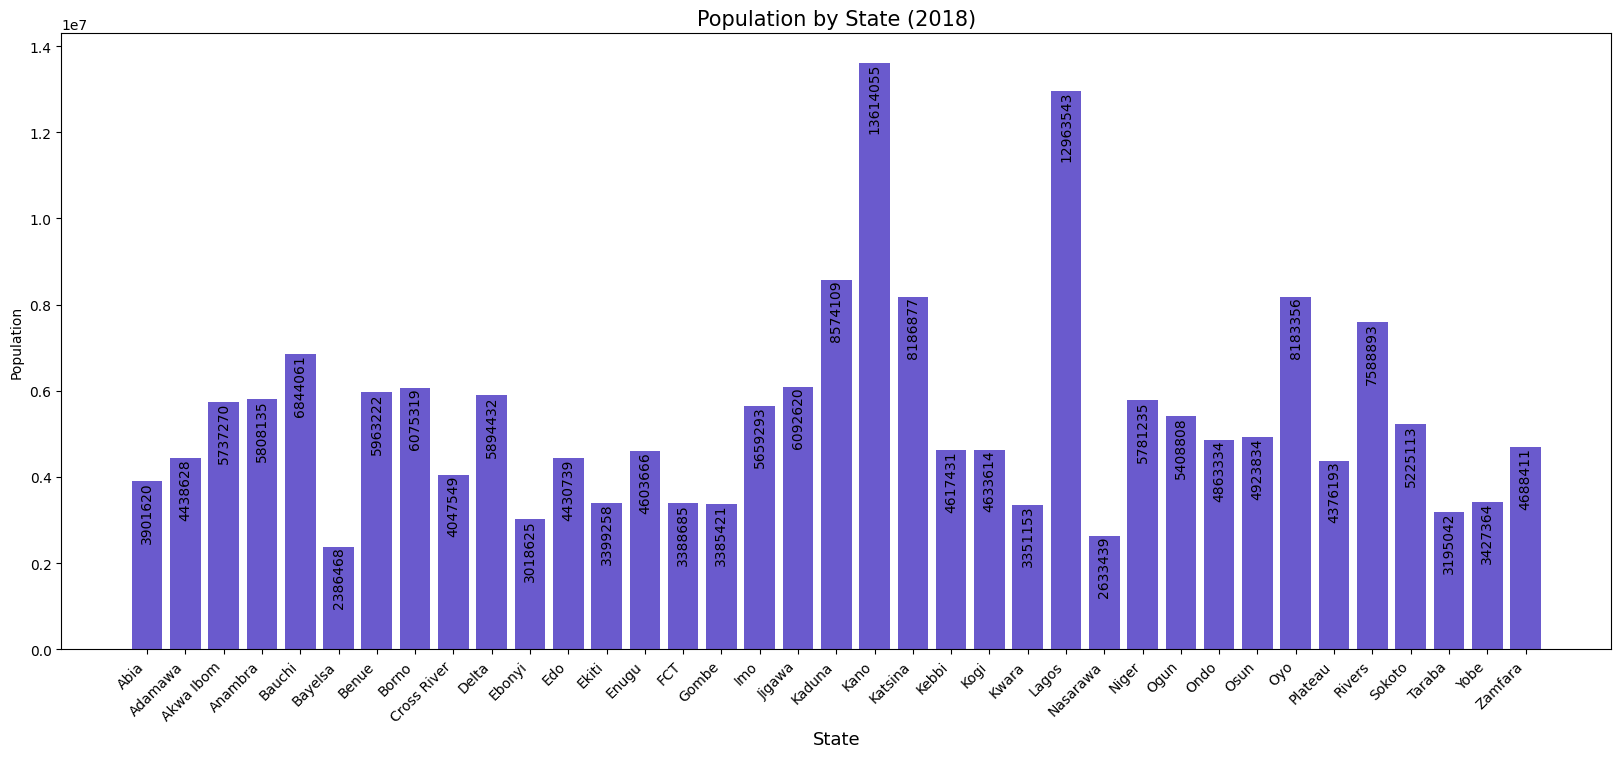

In [ ]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=45, ha='right')
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], rotation='vertical', ha='center', va='top')

if __name__ == '__main__':
    # creating data on which bar chart will be plot
    x = merged_df['state']
    y = merged_df['Estimated Population (2018)']

    # making the bar chart on the data
    plt.bar(x, y, color='slateblue')

    # calling the function to add value labels
    addlabels(x, y)



    # giving title to the plot
    plt.title('Population by State (2018)', fontsize=15)

    # giving X and Y labels
    plt.xlabel('State', fontsize=13)
    plt.ylabel('Population')

    # visualizing the plot
    plt.show()
